In [1]:
# These libraries will be used for EDA and data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [52]:
pd.set_option('display.max_columns', 100) # shows all the columns
df = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/All_Features.csv').reset_index().rename(columns = {'index' : 'Index'})
df

,Index,Provider,CDC_4019,CDC_25000,CDC_2724,CDC_V5869,CDC_42731,CDC_4011,CDC_V5861,CDC_2449,CDC_2720,CDC_4280,DGC_882,DGC_884,DGC_166,DGC_183,DGC_939,DGC_883,DGC_168,DGC_887,DGC_204,DGC_867,CPC_4019.0,CPC_2724.0,CPC_9904.0,CPC_8154.0,CPC_66.0,CPC_3893.0,CPC_3995.0,CPC_4516.0,CPC_3722.0,CPC_8151.0,Male_Patient,Female_Patient,Age(26-40),Age(41-60),Age(61-80),Age(81-100),Race_White,Race_Black,Race_Hispanic,Race_Native,Hos_Stay_Total,Payment_Total,Claim_Len_Total,Alzheimer,Heartfailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,rheumatoidarthritis,stroke,RenalDisease,State_Count,County_Count,DiagGroupCode,PotentialFraud
0,0,PRV51001,3,1,2,1,2,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,9.0,15.0,0.0,3.0,11.0,10.0,20.0,4.0,0.0,0.0,25.0,109980.0,36,15,19,17,5,10,9,21,23,6,8,6,8,1,7,5.0,No
1,1,PRV51003,25,15,16,7,11,3,6,12,7,14,0,0,1,0,0,1,0,0,0,1,3,1,0,2,1,2,2,1,2,0,49.0,68.0,3.0,29.0,63.0,22.0,94.0,22.0,0.0,1.0,320.0,671956.0,485,56,80,64,10,41,54,100,112,33,38,12,29,3,28,58.0,Yes
2,2,PRV51004,22,8,12,2,3,6,4,8,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.0,93.0,2.0,21.0,78.0,37.0,113.0,20.0,5.0,0.0,0.0,52480.0,213,64,88,50,16,41,63,105,108,49,46,17,23,9,33,0.0,No
3,3,PRV51005,140,54,74,56,23,62,47,30,31,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,208.0,287.0,22.0,85.0,280.0,108.0,382.0,110.0,3.0,0.0,0.0,284610.0,1268,426,680,507,165,295,485,799,895,344,331,124,259,4,27,0.0,Yes
4,4,PRV51007,10,6,5,2,2,3,7,6,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,27.0,31.0,5.0,8.0,36.0,9.0,47.0,11.0,0.0,0.0,16.0,36974.0,69,26,40,22,12,16,29,49,51,21,22,12,11,2,6,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,5405,PRV57759,3,3,0,5,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0,11.0,0.0,2.0,17.0,5.0,19.0,1.0,0.0,4.0,0.0,10770.0,60,14,20,15,4,11,9,20,28,13,9,4,5,1,2,0.0,No
5406,5406,PRV57760,3,2,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,3.0,0.0,3.0,5.0,1.0,7.0,2.0,0.0,0.0,0.0,4770.0,7,3,11,2,0,2,7,18,22,11,1,0,0,1,3,0.0,No
5407,5407,PRV57761,10,2,2,1,2,3,4,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33.0,34.0,3.0,4.0,39.0,21.0,58.0,5.0,1.0,3.0,0.0,18840.0,114,36,56,40,14,30,38,55,62,32,24,10,23,1,2,0.0,No
5408,5408,PRV57762,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1900.0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0.0,No


In [11]:
Final_Features = df[['Provider', 'Payment_Total', 'Hos_Stay_Total', 'RenalDisease', 'stroke',  'CDC_42731', 'CPC_66.0', 'DGC_183', 'DGC_867', 'DGC_204', 'CPC_8151.0', 'PotentialFraud']].reset_index().rename(columns = {'index' : 'Index'})
Final_Features

,Index,Provider,Payment_Total,Hos_Stay_Total,RenalDisease,stroke,CDC_42731,CPC_66.0,DGC_183,DGC_867,DGC_204,PotentialFraud
0,0,PRV51001,109980.0,25.0,8,6,2,0,0,0,0,No
1,1,PRV51003,671956.0,320.0,29,12,11,1,0,1,0,Yes
2,2,PRV51004,52480.0,0.0,23,17,3,0,0,0,0,No
3,3,PRV51005,284610.0,0.0,259,124,23,0,0,0,0,Yes
4,4,PRV51007,36974.0,16.0,11,12,2,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
5405,5405,PRV57759,10770.0,0.0,5,4,0,0,0,0,0,No
5406,5406,PRV57760,4770.0,0.0,0,0,1,0,0,0,0,No
5407,5407,PRV57761,18840.0,0.0,23,10,2,0,0,0,0,No
5408,5408,PRV57762,1900.0,0.0,0,0,0,0,0,0,0,No


In [20]:
Fraud = df.loc[df.PotentialFraud == 'Yes'].corr().unstack().drop_duplicates().\
to_frame().reset_index().rename(columns = {'level_0' : 'Feature1', 'level_1' : 'Feature2', 0 : 'Corr_Coef'}).sort_values(ascending = False, by = 'Corr_Coef')
Fraud.head(40)

,Feature1,Feature2,Corr_Coef
0,Index,Index,1.000000
1676,Diabetes,IschemicHeart,0.999344
1626,Heartfailure,IschemicHeart,0.998905
1625,Heartfailure,Diabetes,0.998890
1667,Depression,Diabetes,0.998363
1612,Alzheimer,Diabetes,0.998023
1668,Depression,IschemicHeart,0.998007
1613,Alzheimer,IschemicHeart,0.997896
1624,Heartfailure,Depression,0.997711
1621,Heartfailure,KidneyDisease,0.997623


In [19]:
NFraud = df.loc[df.PotentialFraud == 'No'].corr().unstack().drop_duplicates().\
to_frame().reset_index().rename(columns = {'level_0' : 'Feature1', 'level_1' : 'Feature2', 0 : 'Corr_Coef'}).sort_values(ascending = False, by = 'Corr_Coef')
NFraud.head(40)

,Feature1,Feature2,Corr_Coef
0,Index,Index,1.000000
1676,Diabetes,IschemicHeart,0.997403
1626,Heartfailure,IschemicHeart,0.996281
1625,Heartfailure,Diabetes,0.995883
1363,Female_Patient,Age(61-80),0.993114
1667,Depression,Diabetes,0.992857
1365,Female_Patient,Race_White,0.992810
1668,Depression,IschemicHeart,0.992658
1337,Male_Patient,Age(61-80),0.992476
1637,KidneyDisease,Diabetes,0.992390


In [8]:
 plt.rcParams["figure.figsize"] = [20, 6]

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text yticklabel objects>)

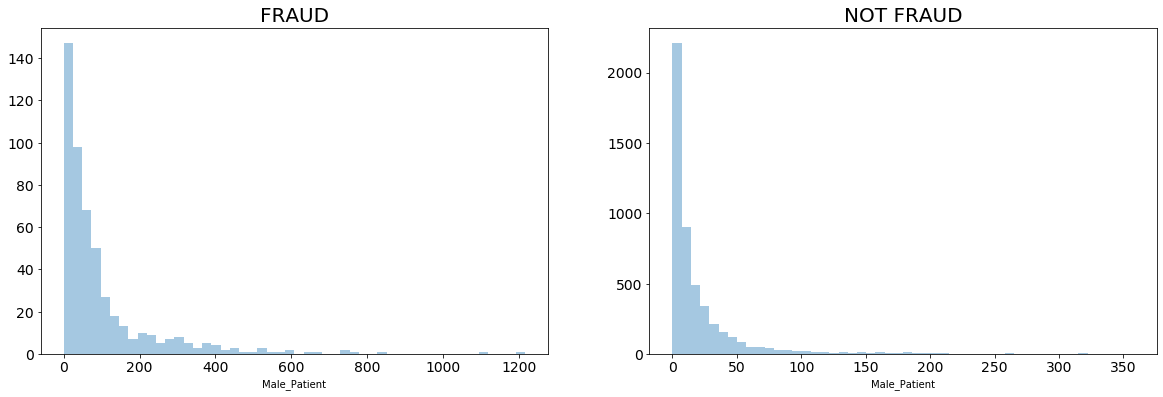

In [40]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df.loc[df.PotentialFraud == 'Yes']['Male_Patient'], kde = False) 
plt.title('FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.figure(1)
plt.subplot(1, 2, 2)
sns.distplot(df.loc[df.PotentialFraud == 'No']['Male_Patient'], kde = False)
plt.title('NOT FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 <a list of 10 Text yticklabel objects>)

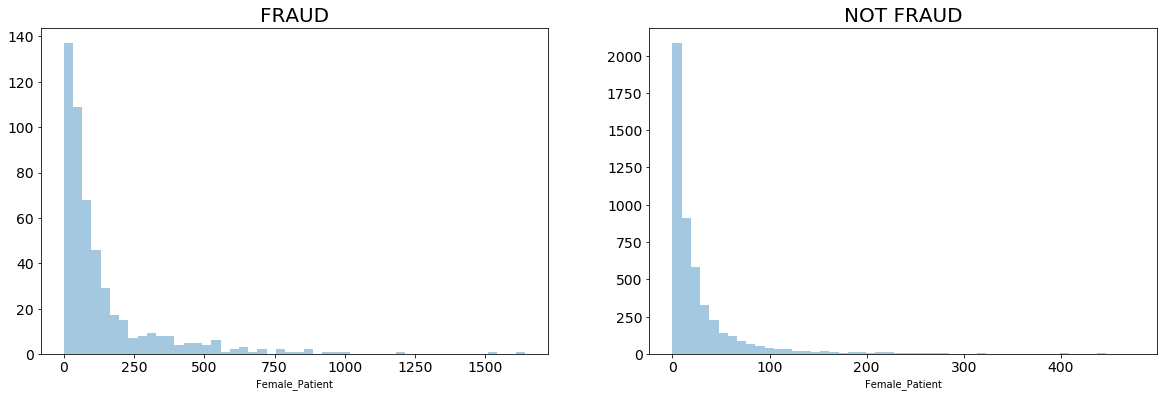

In [39]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df.loc[df.PotentialFraud == 'Yes']['Female_Patient'], kde = False) 
plt.title('FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.figure(1)
plt.subplot(1, 2, 2)
sns.distplot(df.loc[df.PotentialFraud == 'No']['Female_Patient'], kde = False)
plt.title('NOT FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text yticklabel objects>)

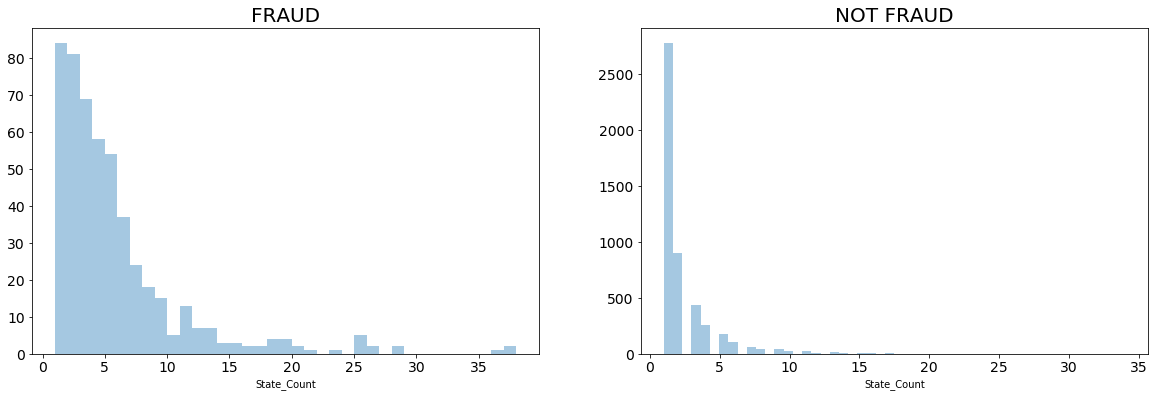

In [41]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df.loc[df.PotentialFraud == 'Yes']['State_Count'], kde = False) 
plt.title('FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.figure(1)
plt.subplot(1, 2, 2)
sns.distplot(df.loc[df.PotentialFraud == 'No']['State_Count'], kde = False)
plt.title('NOT FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text yticklabel objects>)

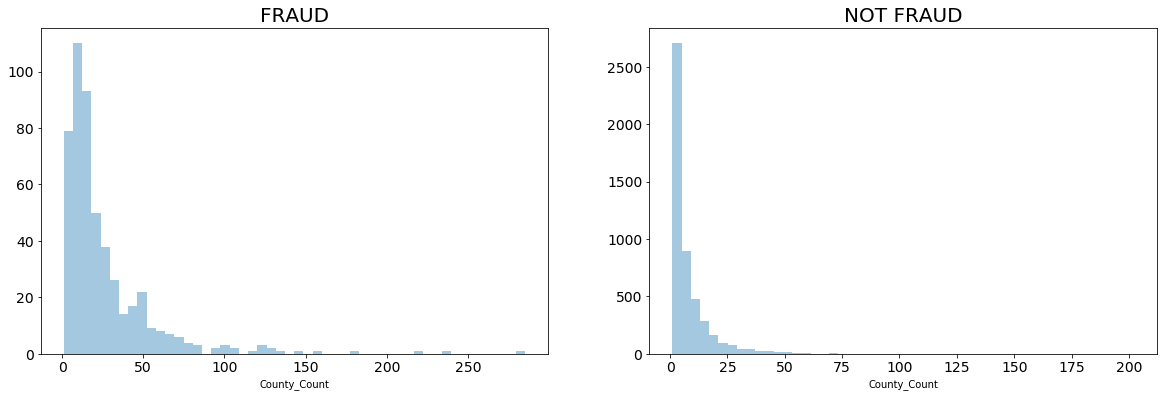

In [42]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df.loc[df.PotentialFraud == 'Yes']['County_Count'], kde = False) 
plt.title('FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.figure(1)
plt.subplot(1, 2, 2)
sns.distplot(df.loc[df.PotentialFraud == 'No']['County_Count'], kde = False)
plt.title('NOT FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text yticklabel objects>)

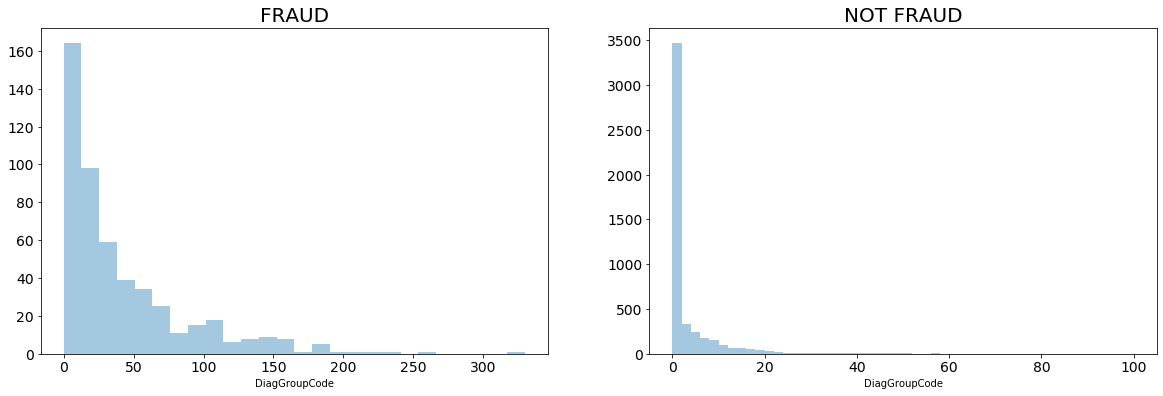

In [43]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df.loc[df.PotentialFraud == 'Yes']['DiagGroupCode'], kde = False) 
plt.title('FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.figure(1)
plt.subplot(1, 2, 2)
sns.distplot(df.loc[df.PotentialFraud == 'No']['DiagGroupCode'], kde = False)
plt.title('NOT FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd105eb2fd0>,
      dtype=object)

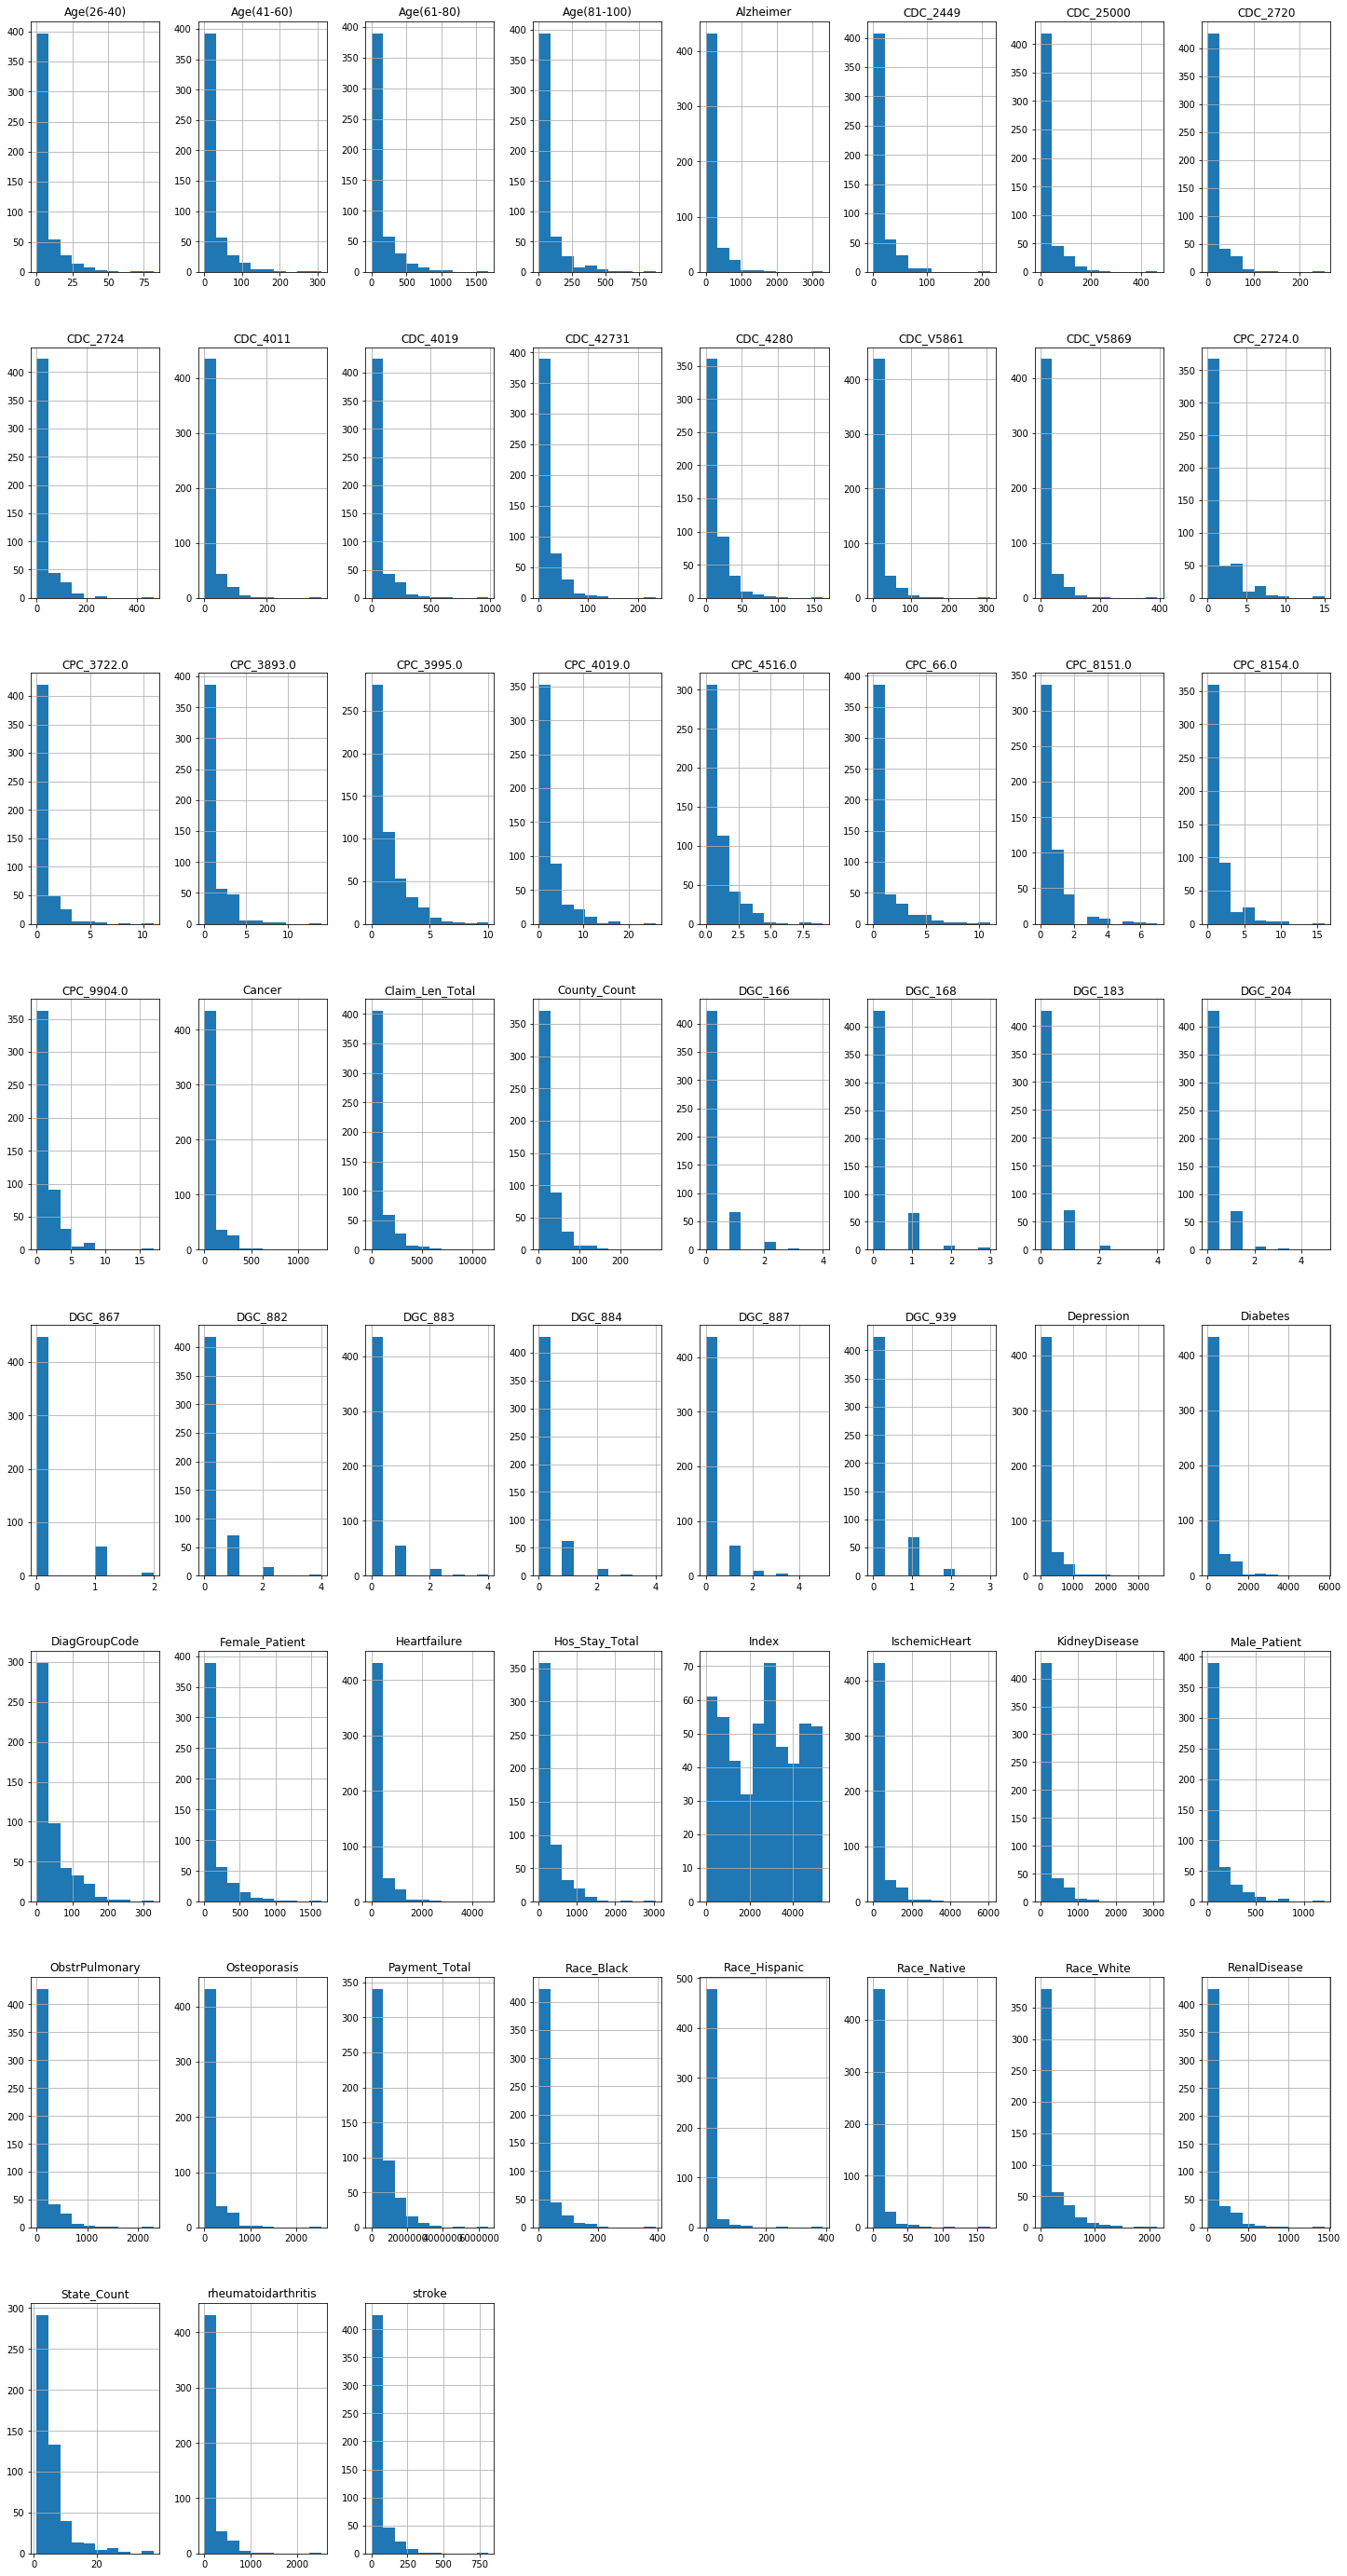

In [56]:
plt.rcParams["figure.figsize"] = [25, 50]
df.loc[df.PotentialFraud == 'Yes'].hist()

In [53]:
df.columns

Index(['Index', 'Provider', 'CDC_4019', 'CDC_25000', 'CDC_2724', 'CDC_V5869',
       'CDC_42731', 'CDC_4011', 'CDC_V5861', 'CDC_2449', 'CDC_2720',
       'CDC_4280', 'DGC_882', 'DGC_884', 'DGC_166', 'DGC_183', 'DGC_939',
       'DGC_883', 'DGC_168', 'DGC_887', 'DGC_204', 'DGC_867', 'CPC_4019.0',
       'CPC_2724.0', 'CPC_9904.0', 'CPC_8154.0', 'CPC_66.0', 'CPC_3893.0',
       'CPC_3995.0', 'CPC_4516.0', 'CPC_3722.0', 'CPC_8151.0', 'Male_Patient',
       'Female_Patient', 'Age(26-40)', 'Age(41-60)', 'Age(61-80)',
       'Age(81-100)', 'Race_White', 'Race_Black', 'Race_Hispanic',
       'Race_Native', 'Hos_Stay_Total', 'Payment_Total', 'Claim_Len_Total',
       'Alzheimer', 'Heartfailure', 'KidneyDisease', 'Cancer',
       'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'rheumatoidarthritis', 'stroke', 'RenalDisease',
       'State_Count', 'County_Count', 'DiagGroupCode', 'PotentialFraud'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Payment per Provider')

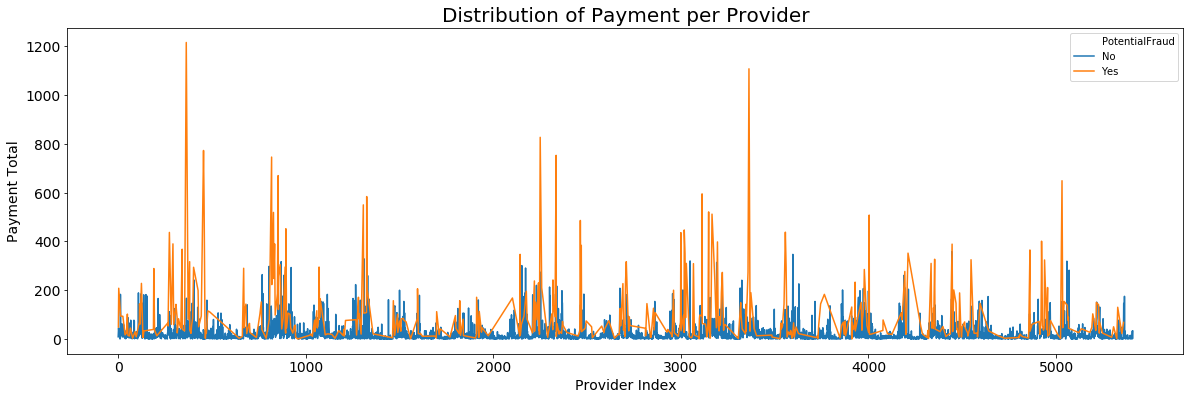

In [25]:
sns.lineplot(x = 'Index', y = 'Male_Patient', data = df, hue = 'PotentialFraud')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Provider Index', fontsize = 14)
plt.ylabel('Payment Total', fontsize = 14)
plt.title('Distribution of Payment per Provider', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Payment per Provider')

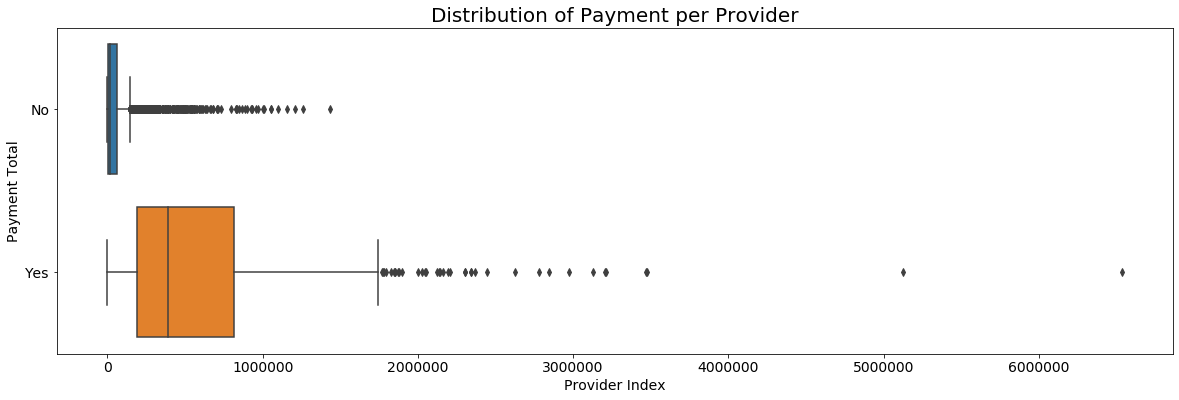

In [24]:
sns.boxplot(x = 'Payment_Total', data = df, y = 'PotentialFraud')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Provider Index', fontsize = 14)
plt.ylabel('Payment Total', fontsize = 14)
plt.title('Distribution of Payment per Provider', fontsize = 20)

In [ ]:
plt.figure(1)
plt.subplot(1, 2, 1)
df1 = Fraud_df[['CDC_41401', 'CDC_496', 'CDC_496', 'CDC_5990', 'CDC_53081', 'CDC_4019']]

sns.boxplot(x = "variable", y = "value", data = pd.melt(df1))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('CDC Codes', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('CDC Codes', fontsize = 14)

plt.subplot(1, 2, 2)
df2 = NFraud_df[['CDC_41401', 'CDC_496', 'CDC_5990', 'CDC_53081', 'CDC_4019']]
sns.boxplot(x = "variable", y = "value", data = pd.melt(df2))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('CDC Codes', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('CDC Codes', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(1)
plt.subplot(1, 2, 1)
df1 = Fraud_df[['Age(26-40)',  'Age(81-100)']]
sns.boxplot(x = "variable", y = "value", data = pd.melt(df1))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Features', fontsize = 14)


plt.subplot(1, 2, 2)
df2 = NFraud_df[['Age(26-40)',  'Age(81-100)']]
sns.boxplot(x = "variable", y = "value", data = pd.melt(df2))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Features', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
Lasso_Features.loc[Lasso_Features.PotentialFraud == 'Yes'].describe(percentiles = [.05, .25, .5, .75, .95])

In [ ]:
Lasso_Features.loc[Lasso_Features.PotentialFraud == 'No'].sample(500).describe(percentiles = [.05, .25, .5, .75, .95])